## Clusternig Algorithms

# K means clustering

Unsupervised learning algorithm, the algorithm itself identifies the pattern from the underlying dataset.
Basic idea of the algorithm is that elements inside a cluster should be very similar to each other but very different from those outside.

K means clustering aims to partition N observations into k number of clusters in which each observation  belongs to a cluster with the nearest mean.

## Algorithm

- Initialize the K centroids at random, the centers of the cluster. Decide for each point which centroid is nearest to them.

- Calculate the new mean of ever cluster. Again repeat for each point which centroid is nearest to them.


When to stop? 

When the cluster centroids dont change much between consecutive iteration, the distance between subsequent centroids is less.


## 1. Elbow Method

### Logic:

K-Means tries to minimize the **Within-Cluster Sum of Squares (WCSS)** — the sum of squared distances from each point to its cluster center.

As `k` increases:
- WCSS always decreases (because more clusters = tighter groups).
- But **after a certain point, the decrease becomes marginal** — like an "elbow" in a graph.

This **elbow point** is the optimal `k`.

###  How It Works:

1. Fit K-Means for different values of `k`.
2. For each `k`, compute the **WCSS** (also called `inertia_` in scikit-learn).
3. Plot `k` vs. WCSS.
4. Look for the "elbow" in the curve — a point after which WCSS doesn’t reduce much.

## 2. Silhouette Scoring

### Logic:

It measures how **well each data point fits** within its assigned cluster, compared to other clusters.

For each point i,
- **a(i)** = Mean distance between `i` and all other points **in the same cluster** (intra-cluster distance).
- **b(i)** = Mean distance between `i` and all points in the **nearest other cluster** (nearest-cluster distance).

s(i) = (b(i)-a(i))/(max{a(i),b(i)})

- s(i) ranges from -1 to 1

| Score Range       | Meaning                                                  |
|-------------------|----------------------------------------------------------|
| **+1**            | Perfect: Point is far from other clusters and well inside its own. |
| **Around 0**      | Borderline: Point lies between clusters.                 |
| **-1**            | Incorrect: Point is closer to a different cluster.


1. Fit K-Means for different values of `k` (≥2).
2. Predict cluster labels.
3. Compute the **average silhouette score** across all data points.
4. **Choose the `k` that gives the highest average score.**



Clustering algorithms create new data!

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#with a small standard deviation
X, y = make_blobs(n_samples=100, centers=5, cluster_std=0.2, random_state=0)


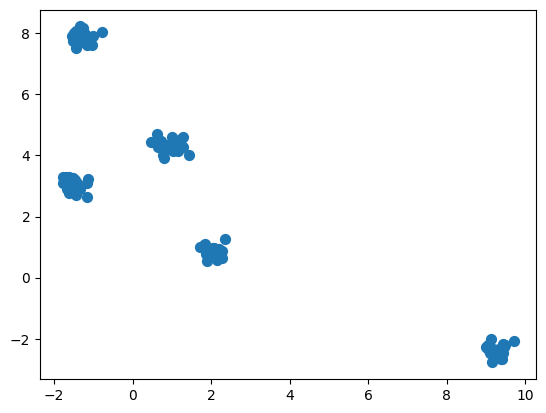

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=50)

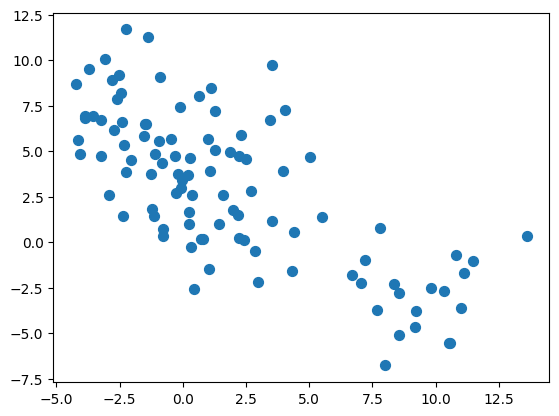

In [4]:
#with a larger standard deviation
X, y = make_blobs(n_samples=100, centers=5, cluster_std=2.0, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [5]:
model = KMeans(3)
model.fit(X)
y_kmeans=model.predict(X)
print(y_kmeans)

[2 0 0 2 0 2 0 0 1 0 2 0 0 1 0 0 0 2 2 1 2 0 0 0 2 1 2 0 0 1 1 0 2 2 0 0 1
 0 1 1 1 0 2 2 1 1 0 2 0 2 2 2 2 1 0 2 1 2 0 2 0 2 1 2 1 0 1 2 2 0 2 2 2 2
 2 0 0 1 0 2 1 0 0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 2]


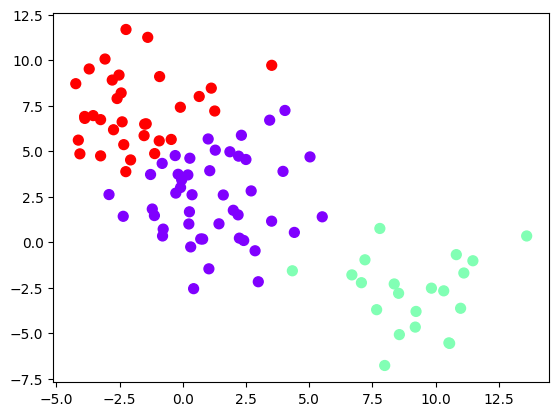

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow')
plt.show()

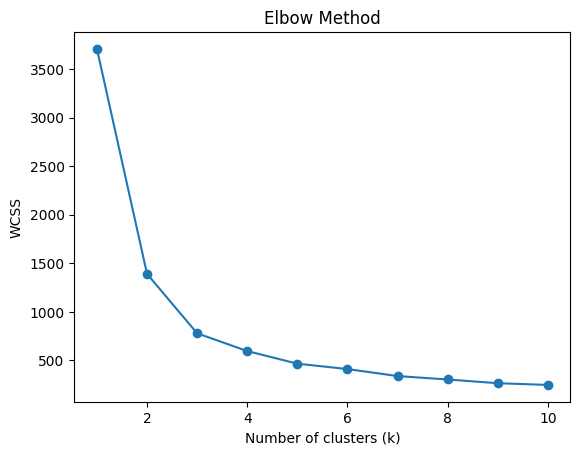

In [7]:
#compute sihoutte and wcss

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [8]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k={k}, silhouette score={score}")

k=2, silhouette score=0.5366355460454553
k=3, silhouette score=0.44343654185746806
k=4, silhouette score=0.41263567831767645
k=5, silhouette score=0.39416547201263247
k=6, silhouette score=0.39360638643640333
k=7, silhouette score=0.33888680154106304
k=8, silhouette score=0.31612417163026957
k=9, silhouette score=0.30451109273108623
k=10, silhouette score=0.3275441800515824


## Text clustering

In [10]:
pip install nltk

  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 435.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.5 MB 1.2 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.5 MB 2.0 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 2.5 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.5 MB 3.5 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.5 MB 3.8 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.5 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.0 MB/s eta 0:00:00
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soundarya.sarathi\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Unzipping corpora\stopwords.zip.


True

| Feature            | **Stemming**                                  | **Lemmatization**                              |
| ------------------ | --------------------------------------------- | ---------------------------------------------- |
| **Definition**     | Removes suffixes to reduce a word to its stem | Reduces word to its dictionary form (lemma)    |
| **Output**         | May not be a real word                        | Always a valid word (lemma)                    |
| **Speed**          | Faster                                        | Slower                                         |
| **Accuracy**       | Less accurate                                 | More accurate                                  |
| **Example (Word)** | *"Caring"* → **"car"**, *"flies"* → **"fli"** | *"Caring"* → **"care"**, *"flies"* → **"fly"** |
| **Uses**           | Good for quick and dirty search indexes       | Good for applications needing precise meaning  |
| **Based On**       | Rule-based (simple heuristics)                | Vocabulary + Morphological analysis            |
| **Tool Examples**  | `PorterStemmer`, `SnowballStemmer` (NLTK)     | `WordNetLemmatizer` (NLTK), `spaCy`            |


# TF-IDF Vectorization Explained

## What is TF-IDF?

**TF-IDF** stands for **Term Frequency – Inverse Document Frequency**. It is a numerical statistic used to reflect how important a word is to a document in a collection (or corpus). TF-IDF is widely used in **text mining**, **information retrieval**, and **natural language processing (NLP)**.


## Why Use TF-IDF?

- It helps **filter out common words** like "the", "is", etc., that occur in most documents.
- It **emphasizes rare words** that can be more meaningful for understanding the content of a document.


## Formula

Given a term `t`, a document `d`, and a corpus `D`:

### 1. Term Frequency (TF)

TF(t, d) = (Number of times  t appears in document d)/(Total number of terms in document d)


### 2. Inverse Document Frequency (IDF)

how frequently or rarely the  term appears accross documents

IDF(t, D) = log (N/(1 + DF(t)))

- `N` = total number of documents in the corpus  
- `DF(t)` = number of documents where term `t` appears  
- The `+1` in denominator avoids division by zero.

### 3. TF-IDF Score

TF * IDF(t, d, D) = TF(t, d) *  IDF(t, D)



In [21]:
def tokenizer(text):
    tokens = word_tokenize(text.lower())
    stemmer= PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens if token.isalpha()]
    return tokens

def cluster_sentences(sentences, n_clusters):
   
    # Create a simple bag-of-words model
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(stop_words=stopwords.words('english') 
                                                                 )
    matrix=vectorizer.fit_transform(sentences)
    print("Matrix:",matrix.toarray()
          )
    print("Feature Names:", vectorizer.get_feature_names_out()
          )
    print("Shape of matrix:", matrix.shape)
    model = KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(matrix)
    labels = model.labels_
    return labels


In [17]:
sentences=["Quantum computing is a rapidly evolving field.",
           "The future of quantum computing is promising.",
           "Machine learning is a subset of artificial intelligence.",
           "Waren Buffett is a legendary investor.",
           "Investing in stocks requires careful analysis.",]

In [22]:
cluster_sentences(sentences, n_clusters=2)

Matrix: [[0.         0.         0.         0.         0.38898761 0.48214012
  0.48214012 0.         0.         0.         0.         0.
  0.         0.         0.         0.38898761 0.48214012 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.44400208 0.
  0.         0.55032913 0.         0.         0.         0.
  0.         0.         0.55032913 0.44400208 0.         0.
  0.         0.         0.        ]
 [0.         0.4472136  0.         0.         0.         0.
  0.         0.         0.4472136  0.         0.         0.4472136
  0.         0.4472136  0.         0.         0.         0.
  0.         0.4472136  0.        ]
 [0.         0.         0.5        0.         0.         0.
  0.         0.         0.         0.         0.5        0.
  0.5        0.         0.         0.         0.         0.
  0.         0.         0.5       ]
 [0.4472136  0.         0.         0.4472136  0.         0.
  0.         0.         0.         0.4472136  0.     

array([0, 0, 0, 0, 1], dtype=int32)